# NBA Game Predictions

In [47]:
# Import libraries: API, data manipulation, plotting
import nba_api
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
from nba_api.stats.endpoints import leaguegamefinder
import datetime as dt

In [49]:
leaguegames = leaguegamefinder.LeagueGameFinder().get_data_frames()[0]

In [50]:
leaguegames.shape

(30000, 28)

In [51]:
leaguegames['HOME'] = np.where(leaguegames['MATCHUP'].apply(lambda x: x[4:7]) == 'vs.', 1, 0)
leaguegames['GAME_DATE'] = pd.to_datetime(leaguegames['GAME_DATE'])
leaguegames[leaguegames['TEAM_ABBREVIATION'] == 'LAL']

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,HOME
118,42022,1610612747,LAL,Los Angeles Lakers,0042200314,2023-05-22,LAL vs. DEN,L,241,111,...,8,30,38,20,5,4,6,19,-2.0,1
133,42022,1610612747,LAL,Los Angeles Lakers,0042200313,2023-05-20,LAL vs. DEN,L,242,108,...,11,34,45,27,3,2,12,18,-11.0,1
146,42022,1610612747,LAL,Los Angeles Lakers,0042200312,2023-05-18,LAL @ DEN,L,240,103,...,4,36,40,26,10,7,12,19,-5.0,0
156,42022,1610612747,LAL,Los Angeles Lakers,0042200311,2023-05-16,LAL @ DEN,L,240,126,...,5,25,30,30,6,4,7,21,-6.0,0
226,42022,1610612747,LAL,Los Angeles Lakers,0042200236,2023-05-12,LAL vs. GSW,W,240,122,...,6,40,46,25,6,6,6,17,21.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29692,22018,1610612747,LAL,Los Angeles Lakers,1521800030,2018-07-08,LAL @ CHI,W,198,69,...,10,34,44,14,9,2,8,17,9.0,0
29715,22018,1610612747,LAL,Los Angeles Lakers,1521800020,2018-07-07,LAL vs. PHI,W,201,96,...,12,32,44,17,6,4,19,23,17.0,1
29778,22018,1610612747,LAL,Los Angeles Lakers,1321800005,2018-07-05,LAL @ GSW,L,240,71,...,9,38,47,16,6,7,23,19,-6.0,0
29792,22018,1610612747,LAL,Los Angeles Lakers,1321800003,2018-07-03,LAL vs. MIA,L,241,74,...,12,24,36,14,7,7,20,27,-15.0,1


In [52]:
def get_games(seasons: list):
    leaguegames['SEASON_ID'] = leaguegames['SEASON_ID'].apply(lambda x: pd.to_datetime(x[1:], format = '%Y'))
    
    try:
        szn_games = leaguegames[leaguegames['SEASON_ID'] == str(seasons[0])] # gotta change this so it can do season_id instead of dates-- figure out what
        if len(seasons)>1:
            for season in seasons[1:]:
                szn_games = pd.concat([szn_games, leaguegames[leaguegames['SEASON_ID'] == str(season)]])
    except:
        print("Seasons not found.")
        return -1
    
    # Remove summer league games! (confusing and irritating for visualizations)
    szn_games = szn_games[szn_games.GAME_DATE.dt.month != 7]
    
    # opposite team merging
    team_games = szn_games[szn_games['TEAM_ABBREVIATION'] == szn_games['MATCHUP'].apply(lambda x: x[:3])]
    o_games = szn_games[szn_games['TEAM_NAME'] != szn_games['MATCHUP'].apply(lambda x: x[:3])]
    
    return team_games.merge(on = 'GAME_ID', suffixes = ['_H', '_O'], right = o_games)
    
df = get_games([2018, 2019, 2020, 2021, 2022])
df

,SEASON_ID_H,TEAM_ID_H,TEAM_ABBREVIATION_H,TEAM_NAME_H,GAME_ID,GAME_DATE_H,MATCHUP_H,WL_H,MIN_H,PTS_H,...,OREB_O,DREB_O,REB_O,AST_O,STL_O,BLK_O,TOV_O,PF_O,PLUS_MINUS_O,HOME_O
0,2018-01-01,1610612761,TOR,Toronto Raptors,0041800406,2019-06-13,TOR @ GSW,W,241,114,...,11,28,39,25,8,2,12,23,4.0,0
1,2018-01-01,1610612761,TOR,Toronto Raptors,0041800406,2019-06-13,TOR @ GSW,W,241,114,...,11,31,42,28,9,6,16,23,-4.0,1
2,2018-01-01,1610612744,GSW,Golden State Warriors,0041800406,2019-06-13,GSW vs. TOR,L,240,110,...,11,28,39,25,8,2,12,23,4.0,0
3,2018-01-01,1610612744,GSW,Golden State Warriors,0041800406,2019-06-13,GSW vs. TOR,L,240,110,...,11,31,42,28,9,6,16,23,-4.0,1
4,2018-01-01,1610612761,TOR,Toronto Raptors,0041800405,2019-06-10,TOR vs. GSW,L,238,105,...,13,30,43,19,6,5,13,19,-1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49341,2022-01-01,200,SGC,76ers GC,1212200006,2022-04-05,SGC @ HCG,W,240,74,...,5,18,23,15,1,5,5,5,29.0,0
49342,2022-01-01,205,CCG,Celtics Crossover Gaming,1212200004,2022-04-05,CCG vs. HTG,W,240,80,...,5,11,16,24,4,3,1,12,29.0,1
49343,2022-01-01,205,CCG,Celtics Crossover Gaming,1212200004,2022-04-05,CCG vs. HTG,W,240,80,...,3,9,12,16,1,0,4,10,-29.0,0
49344,2022-01-01,209,HTG,Hawks Talon GC,1212200004,2022-04-05,HTG @ CCG,L,240,57,...,5,11,16,24,4,3,1,12,29.0,1


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49346 entries, 0 to 49345
Data columns (total 57 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SEASON_ID_H          49346 non-null  datetime64[ns]
 1   TEAM_ID_H            49346 non-null  int64         
 2   TEAM_ABBREVIATION_H  49346 non-null  object        
 3   TEAM_NAME_H          49346 non-null  object        
 4   GAME_ID              49346 non-null  object        
 5   GAME_DATE_H          49346 non-null  datetime64[ns]
 6   MATCHUP_H            49346 non-null  object        
 7   WL_H                 46779 non-null  object        
 8   MIN_H                49346 non-null  int64         
 9   PTS_H                49346 non-null  int64         
 10  FGM_H                49346 non-null  int64         
 11  FGA_H                49346 non-null  int64         
 12  FG_PCT_H             49338 non-null  float64       
 13  FG3M_H               49346 non-

In [54]:
#df['MONTH'] = df['GAME_DATE_H'].dt.month
df['SEASON'] = df['SEASON_ID_H']
#df['YEAR'] = df['GAME_DATE_H'].dt.year

In [55]:
df = df.drop(['SEASON_ID_O', 'SEASON_ID_H', 'GAME_DATE_O', 'TEAM_ID_H', 'TEAM_ID_O', 
              'TEAM_NAME_H', 'TEAM_NAME_O', 'MATCHUP_O', 'WL_O', 'MIN_O', 'MIN_H', 
              'GAME_ID', 'TEAM_ABBREVIATION_O'], axis = 1)
df = df.rename({'GAME_DATE_H':'GAME_DATE'}, axis = 1)
df = df.set_index('GAME_DATE')

# Handle Null Values

In [56]:
df.isnull().sum()

TEAM_ABBREVIATION_H       0
MATCHUP_H                 0
WL_H                   2567
PTS_H                     0
FGM_H                     0
FGA_H                     0
FG_PCT_H                  8
FG3M_H                    0
FG3A_H                    0
FG3_PCT_H                20
FTM_H                     0
FTA_H                     0
FT_PCT_H               3933
OREB_H                    0
DREB_H                    0
REB_H                     0
AST_H                     0
STL_H                     0
BLK_H                     0
TOV_H                     0
PF_H                      0
PLUS_MINUS_H            248
HOME_H                    0
PTS_O                     0
FGM_O                     0
FGA_O                     0
FG_PCT_O                  8
FG3M_O                    0
FG3A_O                    0
FG3_PCT_O                20
FTM_O                     0
FTA_O                     0
FT_PCT_O               3933
OREB_O                    0
DREB_O                    0
REB_O               

In [57]:
df = df.dropna(subset=['WL_H'], axis = 0)
df.isna().sum()

TEAM_ABBREVIATION_H       0
MATCHUP_H                 0
WL_H                      0
PTS_H                     0
FGM_H                     0
FGA_H                     0
FG_PCT_H                  0
FG3M_H                    0
FG3A_H                    0
FG3_PCT_H                 6
FTM_H                     0
FTA_H                     0
FT_PCT_H               1378
OREB_H                    0
DREB_H                    0
REB_H                     0
AST_H                     0
STL_H                     0
BLK_H                     0
TOV_H                     0
PF_H                      0
PLUS_MINUS_H            248
HOME_H                    0
PTS_O                     0
FGM_O                     0
FGA_O                     0
FG_PCT_O                  0
FG3M_O                    0
FG3A_O                    0
FG3_PCT_O                 6
FTM_O                     0
FTA_O                     0
FT_PCT_O               1380
OREB_O                    0
DREB_O                    0
REB_O               

In [58]:
df['FTA_H'][np.isnan(df['FT_PCT_H'])].value_counts() # these are all 0 sheesh

0    1378
Name: FTA_H, dtype: int64

In [59]:
# df['FT_PCT_H'].fillna(value = (df['FTM_H']/df['FTA_H']), inplace = True)
# df['FT_PCT_O'].fillna(value = (df['FTM_O']/df['FTA_O']), inplace = True)

df['FT_PCT_H'] = df['FT_PCT_H'].fillna(0)
df['FT_PCT_O'] = df['FT_PCT_O'].fillna(0)

In [60]:
df = df.dropna(subset = ['PLUS_MINUS_H', 'PLUS_MINUS_O'], axis = 0)
df.isna().sum()

TEAM_ABBREVIATION_H    0
MATCHUP_H              0
WL_H                   0
PTS_H                  0
FGM_H                  0
FGA_H                  0
FG_PCT_H               0
FG3M_H                 0
FG3A_H                 0
FG3_PCT_H              4
FTM_H                  0
FTA_H                  0
FT_PCT_H               0
OREB_H                 0
DREB_H                 0
REB_H                  0
AST_H                  0
STL_H                  0
BLK_H                  0
TOV_H                  0
PF_H                   0
PLUS_MINUS_H           0
HOME_H                 0
PTS_O                  0
FGM_O                  0
FGA_O                  0
FG_PCT_O               0
FG3M_O                 0
FG3A_O                 0
FG3_PCT_O              4
FTM_O                  0
FTA_O                  0
FT_PCT_O               0
OREB_O                 0
DREB_O                 0
REB_O                  0
AST_O                  0
STL_O                  0
BLK_O                  0
TOV_O                  0


## Feature Engineering

In [61]:
# Possessions: 0.96*[(Field Goal Attempts)+(Turnovers)+0.44*(Free Throw Attempts)-(Offensive Rebounds)]
df['POSS_H'] = 0.96*(df['FGA_H'] + df['TOV_H'] + 0.44*(df['FTA_H']) - df['OREB_H'])
df['POSS_O'] = 0.96*(df['FGA_O'] + df['TOV_O'] + 0.44*(df['FTA_O']) - df['OREB_O'])

In [62]:
# OFFRTG 100*((Points)/(POSS))
df['OFFRTG_H'] = 100*(df.PTS_H/df.POSS_H)
df['OFFRTG_O'] = 100*(df.PTS_O/df.POSS_O)

In [63]:
# DEFRTG 100*((Opp Points)/(Opp POSS))
df['DEFRTG_H'] = 100*(df.PTS_O/df.POSS_O)
df['DEFRTG_O'] = 100*(df.PTS_H/df.POSS_H)

In [64]:
# Whether the team was playing home
df['HOME_H'] = np.where(df['MATCHUP_H'].apply(lambda x: x[4:7]) == 'vs.', 1, 0)
df = df.drop('MATCHUP_H', axis = 1)

In [65]:
# Whether W was home
df['HOME_W_H'] = np.where((df.HOME_H == 1) & (df.WL_H == 1), 1, 0)
df['HOME_W_O'] = np.where((df.HOME_H == 0) & (df.WL_H == 0), 1, 0)

In [66]:
# Effective Field Goal %
df['EFG_H'] = (df.FGM_H+(0.5*df.FG3M_H))/(df.FGA_H+df.FG3A_H)
df['EFG_O'] = (df.FGM_O+(0.5*df.FG3M_O))/(df.FGA_O+df.FG3A_O)

In [67]:
# True Shooting %
df['TS_H'] = (df.PTS_H/(2*(df.FGA_H+(0.44*df.FTA_H))))*100
df['TS_O'] = (df.PTS_O/(2*(df.FGA_O+(0.44*df.FTA_O))))*100

In [68]:
df['WL_H'] = df['WL_H'].apply(lambda x: 1 if x=='W' else 0)

In [69]:
df = df.drop('SEASON', axis = 1)

In [70]:
column_to_move = df.pop('WL_H')
df.insert(len(df.columns), "WL_H", column_to_move) # move to last place

In [71]:
df.shape[0]

46531

In [72]:
df.shape

(46531, 54)

In [73]:
df

,TEAM_ABBREVIATION_H,PTS_H,FGM_H,FGA_H,FG_PCT_H,FG3M_H,FG3A_H,FG3_PCT_H,FTM_H,FTA_H,...,OFFRTG_O,DEFRTG_H,DEFRTG_O,HOME_W_H,HOME_W_O,EFG_H,EFG_O,TS_H,TS_O,WL_H
GAME_DATE,,,,,,,,,,,,,,,,,,,,,
2019-06-13,TOR,114,39,82,0.476,13,33,0.394,23,29,...,124.007937,124.007937,124.007937,0,0,0.395652,0.395652,60.151963,60.151963,1
2019-06-13,TOR,114,39,82,0.476,13,33,0.394,23,29,...,116.683639,116.683639,124.007937,0,0,0.395652,0.400901,60.151963,59.012876,1
2019-06-13,GSW,110,39,80,0.488,11,31,0.355,21,30,...,124.007937,124.007937,116.683639,0,0,0.400901,0.395652,59.012876,60.151963,0
2019-06-13,GSW,110,39,80,0.488,11,31,0.355,21,30,...,116.683639,116.683639,116.683639,0,0,0.400901,0.400901,59.012876,59.012876,0
2019-06-10,TOR,105,38,85,0.447,8,32,0.250,21,27,...,112.897399,112.897399,112.897399,0,0,0.358974,0.358974,54.190751,54.190751,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-05,SGC,74,30,44,0.682,11,21,0.524,3,3,...,170.086790,170.086790,170.086790,0,0,0.546154,0.546154,81.641659,81.641659,1
2022-04-05,CCG,80,31,47,0.660,15,27,0.556,3,3,...,188.026474,188.026474,188.026474,0,0,0.520270,0.520270,82.781457,82.781457,1
2022-04-05,CCG,80,31,47,0.660,15,27,0.556,3,3,...,141.369048,141.369048,188.026474,0,0,0.520270,0.483051,82.781457,69.512195,1


In [74]:
df.to_csv('NBA_Model_Data.csv')

In [75]:
# get nba main league team abbreviations

team_abv = pd.read_csv('Team_abv.csv')

In [76]:
team_abv

,Abbreviation/\nAcronym,Franchise
0,ATL,Atlanta Hawks
1,BOS,Boston Celtics
2,BKN,Brooklyn Nets
3,CHA,Charlotte Hornets
4,CHI,Chicago Bulls
5,CLE,Cleveland Cavaliers
6,DAL,Dallas Mavericks
7,DEN,Denver Nuggets
8,DET,Detroit Pistons
9,GSW,Golden State Warriors


In [77]:
teams = team_abv['Abbreviation/\nAcronym']
teams

0     ATL
1     BOS
2     BKN
3     CHA
4     CHI
5     CLE
6     DAL
7     DEN
8     DET
9     GSW
10    HOU
11    IND
12    LAC
13    LAL
14    MEM
15    MIA
16    MIL
17    MIN
18    NOP
19    NYK
20    OKC
21    ORL
22    PHI
23    PHX
24    POR
25    SAC
26    SAS
27    TOR
28    UTA
29    WAS
Name: Abbreviation/\nAcronym, dtype: object

In [78]:
df[df['TEAM_ABBREVIATION_H'].isin(teams)]

,TEAM_ABBREVIATION_H,PTS_H,FGM_H,FGA_H,FG_PCT_H,FG3M_H,FG3A_H,FG3_PCT_H,FTM_H,FTA_H,...,OFFRTG_O,DEFRTG_H,DEFRTG_O,HOME_W_H,HOME_W_O,EFG_H,EFG_O,TS_H,TS_O,WL_H
GAME_DATE,,,,,,,,,,,,,,,,,,,,,
2019-06-13,TOR,114,39,82,0.476,13,33,0.394,23,29,...,124.007937,124.007937,124.007937,0,0,0.395652,0.395652,60.151963,60.151963,1
2019-06-13,TOR,114,39,82,0.476,13,33,0.394,23,29,...,116.683639,116.683639,124.007937,0,0,0.395652,0.400901,60.151963,59.012876,1
2019-06-13,GSW,110,39,80,0.488,11,31,0.355,21,30,...,124.007937,124.007937,116.683639,0,0,0.400901,0.395652,59.012876,60.151963,0
2019-06-13,GSW,110,39,80,0.488,11,31,0.355,21,30,...,116.683639,116.683639,116.683639,0,0,0.400901,0.400901,59.012876,59.012876,0
2019-06-10,TOR,105,38,85,0.447,8,32,0.250,21,27,...,112.897399,112.897399,112.897399,0,0,0.358974,0.358974,54.190751,54.190751,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,DAL,92,35,67,0.522,11,21,0.524,11,11,...,118.546924,118.546924,118.546924,0,0,0.460227,0.460227,64.031180,64.031180,1
2022-04-24,ATL,88,31,73,0.425,14,23,0.609,12,17,...,112.502045,112.502045,112.502045,0,0,0.395833,0.395833,54.671968,54.671968,1
2022-04-24,ATL,88,31,73,0.425,14,23,0.609,12,17,...,84.399953,84.399953,112.502045,0,0,0.395833,0.283019,54.671968,40.041783,1


Got rid of over 25% of the data!!! Good.

# Create RNN Pipeline

## Model

In [79]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, GRU, LSTM, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

# model
model.add(Bidirectional(LSTM(8, return_sequences=True, recurrent_dropout=0.2, activation='relu'), input_shape = (8, 53)))
model.add(Bidirectional(SimpleRNN(8, recurrent_dropout=0.2, activation='relu')))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

es = EarlyStopping(monitor='val_accuracy', mode='max', 
                   patience=20, 
                   verbose=1,
                   restore_best_weights=True)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 8, 16)            3968      
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 16)               400       
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                544       
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 16)               

# Train Loop

In [80]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [82]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from keras.utils import pad_sequences
from keras.preprocessing.sequence import TimeseriesGenerator
import time

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

val_accuracies = []
train_accuracies = []
val_losses = []
train_losses = []

start = time.time()

for team in teams:
    data = df[df['TEAM_ABBREVIATION_H'] == team]
    data = data.drop('TEAM_ABBREVIATION_H', axis = 1)
    
    # specify the number of lag games
    n_games = 8
    n_features = 53
    
    data_X = data.iloc[:, :-1]
    data_y = np.array(data['WL_H'])

    scaler = MinMaxScaler()
    data_X = scaler.fit_transform(data_X)

    scaled = np.hstack((data_X, data_y.reshape(data.shape[0], 1)))
    
    # frame as supervised learning
    reframed = series_to_supervised(scaled, n_games, 1)
    # print(reframed.shape)

    # split into train and test sets
    values = reframed.values
    train = values[:int(reframed.shape[0]*0.8), :]
    test = values[int(reframed.shape[0]*0.8):, :]
    
    # print(df.shape[0], df.shape[0]*0.8)
    # print(test)
    
    # split into input and outputs
    n_obs = n_games * n_features
    train_X, train_y = train[:, :n_obs], train[:, -1]
    test_X, test_y = test[:, :n_obs], test[:, -1]
    # print(train_X.shape, len(train_X), train_y.shape)
    # print(test_X.shape, len(test_X), test_y.shape)

    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], n_games, n_features))
    test_X = test_X.reshape((test_X.shape[0], n_games, n_features))
    # print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
    
    # print(train_y)
    # print(test_y)
    
    history = model.fit(train_X, train_y,
                    callbacks = [es],
                    epochs=5000, 
                    batch_size=10,
                    validation_data=(test_X, test_y),
                    verbose = 1,
                    shuffle = False)
    
    val_accuracies.append(history.history['val_accuracy'])
    train_accuracies.append(history.history['accuracy'])
    val_losses.append(history.history['val_loss'])
    train_losses.append(history.history['loss'])
    
end = time.time()

Epoch 1/5000
90/90 [==============================] - 4s 11ms/step - loss: 0.4106 - accuracy: 0.7770 - val_loss: 0.3788 - val_accuracy: 0.7320
Epoch 2/5000
90/90 [==============================] - 1s 9ms/step - loss: 0.4124 - accuracy: 0.7826 - val_loss: 0.3904 - val_accuracy: 0.7062
Epoch 3/5000
90/90 [==============================] - 1s 10ms/step - loss: 0.4167 - accuracy: 0.7815 - val_loss: 0.3955 - val_accuracy: 0.7113
Epoch 4/5000
90/90 [==============================] - 1s 10ms/step - loss: 0.3920 - accuracy: 0.7949 - val_loss: 0.3903 - val_accuracy: 0.7165
Epoch 5/5000
90/90 [==============================] - 1s 10ms/step - loss: 0.3842 - accuracy: 0.8049 - val_loss: 0.3882 - val_accuracy: 0.7062
Epoch 6/5000
90/90 [==============================] - 1s 10ms/step - loss: 0.3749 - accuracy: 0.7893 - val_loss: 0.3876 - val_accuracy: 0.7216
Epoch 7/5000
90/90 [==============================] - 1s 10ms/step - loss: 0.3873 - accuracy: 0.7781 - val_loss: 0.3766 - val_accuracy: 0.7371


In [83]:
print(f"{(end-start)//60} minutes")

10.0 minutes


In [85]:
model.save('nba_model')

INFO:tensorflow:Assets written to: nba_model/assets


## Metrics

In [86]:
import matplotlib.pyplot as plt

### Accuracy

In [90]:
val_accuracies = [item for sublist in val_accuracies for item in sublist]
train_accuracies = [item for sublist in train_accuracies for item in sublist]

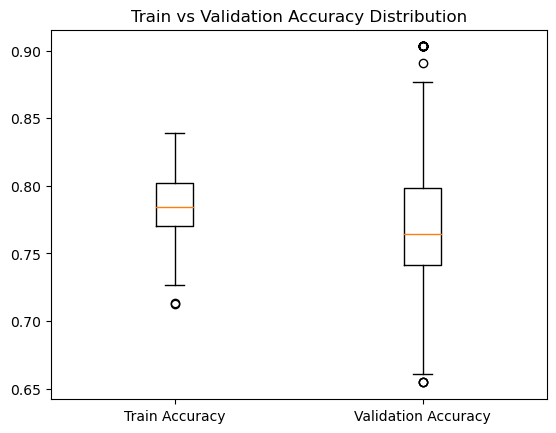

In [93]:
plt.boxplot([train_accuracies, val_accuracies])
plt.xticks([1, 2], ['Train Accuracy', 'Validation Accuracy'])
plt.title('Train vs Validation Accuracy Distribution')

plt.show()

In [97]:
print(f"Validation Accuracy Mean: {np.mean(val_accuracies)}")
print(f"Validation Accuracy Median: {np.median(val_accuracies)}")

Validation Accuracy Mean: 0.7712123248450182
Validation Accuracy Median: 0.7644444704055786


### Loss

In [94]:
val_losses = [item for sublist in val_losses for item in sublist]
train_losses = [item for sublist in train_losses for item in sublist]

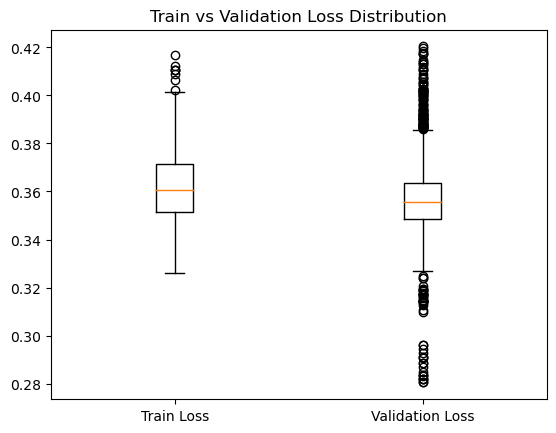

In [95]:
plt.boxplot([train_losses, val_losses])
plt.xticks([1, 2], ['Train Loss', 'Validation Loss'])
plt.title('Train vs Validation Loss Distribution')

plt.show()